In [1]:
#pip install statsmodels

In [2]:
import pandas as pd
import statsmodels.api as sm
from numpy import *

# 忽略警告提醒
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 导入个股数据：'2017_2021_daily.csv'
file_name = '2017_2021_daily.csv'
data = pd.DataFrame(pd.read_csv(file_name, index_col=0,parse_dates=True)).dropna()
data.head()

,顺发恒业,贵州茅台,重庆啤酒,中南传媒,海天味业,五粮液
date,,,,,,
2017-01-03,4.86,334.56,18.30,16.76,29.72,34.66
2017-01-04,4.87,351.91,18.46,16.78,29.73,35.90
2017-01-05,4.89,346.74,18.68,16.63,29.83,35.93
2017-01-06,4.79,350.76,18.34,16.31,29.60,36.10
2017-01-09,4.85,348.51,18.50,16.39,30.14,36.45


In [4]:
# 按照对数收益率的计算公式得到股票收益率
returns = log(data/data.shift(1)).dropna()

In [5]:
returns

,顺发恒业,贵州茅台,重庆啤酒,中南传媒,海天味业,五粮液
date,,,,,,
2017-01-04,0.002055,0.050559,0.008705,0.001193,0.000336,0.035151
2017-01-05,0.004098,-0.014800,0.011847,-0.008979,0.003358,0.000835
2017-01-06,-0.020662,0.011527,-0.018369,-0.019430,-0.007740,0.004720
2017-01-09,0.012448,-0.006435,0.008686,0.004893,0.018079,0.009649
2017-01-10,-0.002064,0.001405,0.002160,-0.007963,0.003643,0.001371
...,...,...,...,...,...,...
2021-12-27,0.052863,-0.028791,-0.025471,-0.023734,0.032835,-0.023969
2021-12-28,-0.038679,0.002979,0.036615,0.010858,-0.015134,0.005783
2021-12-29,0.002813,-0.046515,-0.002648,-0.021835,-0.037913,-0.051298


In [6]:
# 导入中证100指数数据：'399903_2017_2021.csv'
file_name = '399903_2017_2021.csv'
data = pd.DataFrame(pd.read_csv(file_name, index_col=0,parse_dates=True)).dropna()
data.head()

,中证100
date,
2017-01-03,3166.40
2017-01-04,3188.31
2017-01-05,3187.50
2017-01-06,3169.13
2017-01-09,3181.00


In [7]:
# 计算中证100 指数的日收益率的时间序列
Rm = log(data/data.shift(1)).dropna()  

In [8]:
# 假设无风险固定收益为3.2%，那么平均每日的无风险收益率为
Rf = 1.032 ** (1 / 360) - 1

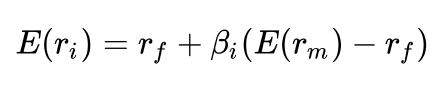

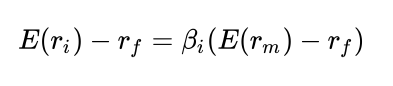

Ri-Rf = α +β(Rm-Rf)  
Ri：代表个股  
Rf：无风险资产，通常使用银行存款或国债的年化收益率  
Rm：市场指数收益率，即大盘收益率  
α： Alpha  
在CAPM模型中，首先假设 Ri 服从正态分布随机数，并且所有资产的 Alpha 都应该是零或接近于 0，
如果和零有显著差异，说明个股有异常收益，代表收益率胜过大盘。β = 1 ，说明个股收益与大盘收益的波动性一致，
|β|<1，说明个股的波动程度小于大盘，|β|>1，说明个股的波动大于大盘。


In [9]:
# 茅台或平安 和 沪深300各自的风险溢价
Ri_Rf = returns -Rf
Rm_Rf = Rm - Rf

In [10]:
Ri_Rf

,顺发恒业,贵州茅台,重庆啤酒,中南传媒,海天味业,五粮液
date,,,,,,
2017-01-04,0.001968,0.050472,0.008618,0.001105,0.000249,0.035064
2017-01-05,0.004011,-0.014888,0.011760,-0.009067,0.003270,0.000748
2017-01-06,-0.020749,0.011440,-0.018456,-0.019517,-0.007828,0.004633
2017-01-09,0.012361,-0.006523,0.008599,0.004805,0.017991,0.009561
2017-01-10,-0.002151,0.001317,0.002072,-0.008051,0.003555,0.001283
...,...,...,...,...,...,...
2021-12-27,0.052776,-0.028879,-0.025559,-0.023821,0.032748,-0.024056
2021-12-28,-0.038766,0.002891,0.036527,0.010770,-0.015221,0.005696
2021-12-29,0.002725,-0.046603,-0.002736,-0.021922,-0.038001,-0.051385


In [11]:
Rm_Rf

,中证100
date,
2017-01-04,0.006808
2017-01-05,-0.000342
2017-01-06,-0.005867
2017-01-09,0.003651
2017-01-10,-0.001925
...,...
2021-12-27,-0.001564
2021-12-28,0.007376
2021-12-29,-0.018202


In [12]:
for stock in ["顺发恒业", "贵州茅台"]:
    model = sm.OLS(Ri_Rf[stock], sm.add_constant(Rm_Rf))
    result = model.fit()
    print(result.summary())
    print('\n\n')
    print('{}的资本资产定价模型表达式为：E(R) = 3.2% + {:2f}×Rm '.\
      format(stock,result.params[1]))
    print('\n\n')

                            OLS Regression Results                            
Dep. Variable:                   顺发恒业   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     189.4
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           3.75e-40
Time:                        01:34:52   Log-Likelihood:                 3157.1
No. Observations:                1216   AIC:                            -6310.
Df Residuals:                    1214   BIC:                            -6300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.945      0.3